<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Hydrofoil_abril_14_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [4]:
# leitura dos dados
df=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [5]:
df.head(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,2,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,3,3,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [6]:
df.tail(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
56,57,57,4,2.074661,274.586200,98.242317,2.955929,2048.288760
57,58,58,4,2.157647,291.257505,98.290939,2.932024,2259.555115
58,59,59,4,2.240634,286.354180,104.693695,2.979833,2306.958369


In [7]:
Dat_Select=df.iloc[:,2:]

In [8]:
Dat_Select.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [9]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()

X = Dat_Select[['Hydrofoil','Froude']]
y = np.array(Dat_Select[['Power']]).reshape(-1,1)


In [10]:
scaler = preprocessing.MinMaxScaler((-1,1)).fit(X)
scalerY = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=42)

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = scalerY.transform(y_train)
y_test = scalerY.transform(y_test)

In [13]:
# define a rede neural 
model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8),random_state=1)

In [14]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [15]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [16]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scalerY.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scalerY.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scalerY.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scalerY.inverse_transform(y_calc_test.reshape(-1,1))

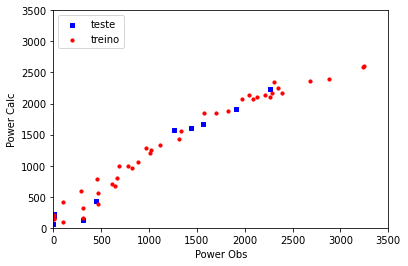

In [17]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.xlim([0,3500])
plt.ylim([0,3500])
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()

In [18]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 49470.23597847487
R^2 teste= 0.9253478636758268


In [19]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 64329.885990997005
R^2 treino= 0.9330598863761347
